In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [2]:
# Load dataset
iris = datasets.load_iris()

In [3]:
X = iris.data

In [4]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[1.01, 0.06, 0.06, 0.02, 0.36, 0.09, 0.22, 0.03, 0.01, 0.07, 0.13, 0.01, 0.14, 0.02, 0.27, 0.02, 0.06, 0.01, 0.19, 0.02, 0.11, 0.03, 0.06, 0.19, 0.26, 0.06, 0.03, 0.04, 0.14, 0.01, 0.12, 0.3, 0.29, 0.02, 0.22, 0.22, 0.05, 0.03, 0.04, 0.11, 0.1, 0.12, 0.19, 0.01, 0.07, 1.0, 0.22, 0.25, 0.05, 0.03, 0.04, 0.38, 0.21, 0.03, 0.05, 0.35, 0.28, 0.03, 0.04, 0.04, 0.09, 0.04, 0.23, 0.02, 0.11, 0.08, 0.24, 0.03, 0.34, 0.21, 0.05, 0.06, 0.32, 0.02, 0.03, 0.14, 0.19, 0.32, 0.03, 0.18, 0.02, 0.17, 0.01, 0.01, 0.02, 0.04, 0.2, 1.0, 0.14, 0.03, 0.13, 0.06, 0.23, 0.05, 0.01, 0.08, 0.13, 0.15, 0.04, 0.02, 0.04, 0.19, 0.02, 0.07, 0.1, 0.01, 0.06, 0.16, 0.09, 0.02, 0.12, 0.35, 0.09, 0.05, 0.19, 0.07, 0.03, 0.1, 0.43, 0.08, 0.02, 0.38, 0.02, 0.16, 0.01, 0.01, 0.24, 0.12, 0.97, 0.01, 0.04, 0.12, 0.27, 0.32, 0.03, 0.14, 0.16, 0.19, 0.03, 0.02, 0.06, 0.03, 0.01, 0.13, 0.25, 0.02, 0.06, 0.02, 0.24, 0.34, 0.01, 0.01, 0.41, 0.11, 0.02, 0.01, 0.21, 0.09, 0.11, 0.15, 0.21, 0.03, 0.16, 0.04, 0.09, 0.01, 0.02, 0.39

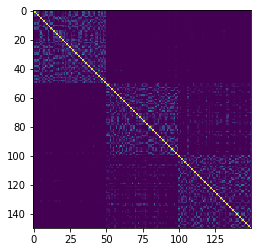

In [7]:
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

In [6]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Adjusted Rand Score: 0.6333560373711087
